# 9.1 A Brief matplotlib API Primer（一个简单的matplotlib API入门）

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


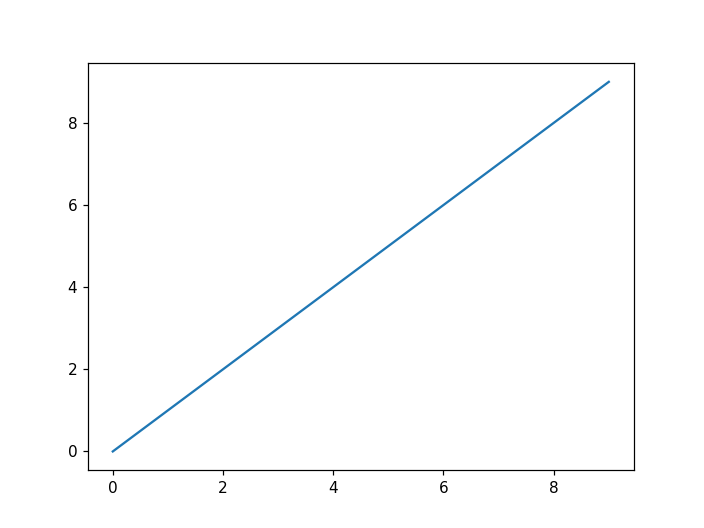

In [5]:
plt.plot(data)

seaborn和pandas内建的一些绘图函数能帮我们省去很多画图的繁杂工作，但如果我们想要定制化地做出一些函数无法绘出的图，就需要了解一些matplotlib的API了。

1 Figures and Subplots（图和子图）
在matplotlib中画的图，都是在Figure对象中的。可以用plt.figure创建一个：

如果实在ipython里执行，可以看到一个空白的绘图窗口出现，但是在jupyter中没有任何显示，除非我们输入一些命令。plt.figure有一些选择，其中figsize保证figure有固定的大小和长宽比，这样也方便保存到磁盘中。

我们不能在一个空白的figure上绘图，必须要创建一个或更多的subplots（子图），用add_subplot:

这行代码的意思是，figure是2x2（这样一共有4幅图），而且我们选中4个subplots（数字从1到4）中的第1个。如果要创建另外两个子图，可以输入：

<IPython.core.display.Javascript object>


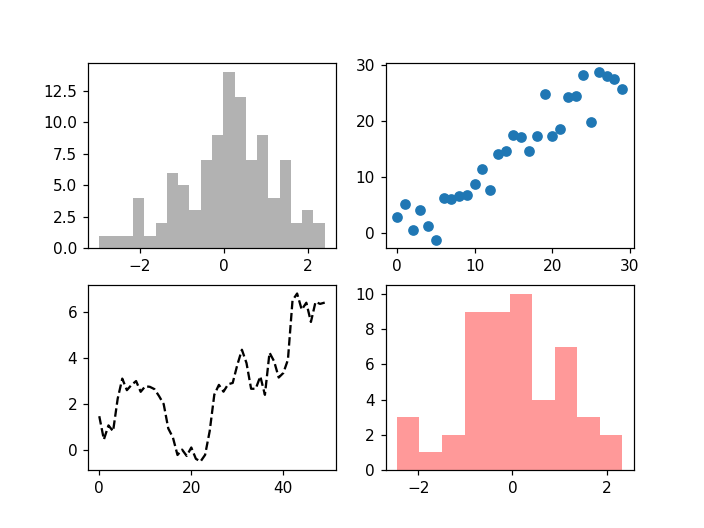

(array([ 3.,  1.,  2.,  9.,  9., 10.,  4.,  7.,  3.,  2.]),
 array([-2.45448652, -1.97572769, -1.49696886, -1.01821003, -0.5394512 ,
        -0.06069238,  0.41806645,  0.89682528,  1.37558411,  1.85434294,
         2.33310177]),
 <a list of 10 Patch objects>)

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')
ax4.hist(np.random.randn(50), bins = 10, color = 'r', alpha = 0.4)

因为创建一个带有多个subplot的figure是很常见的操作，所以matplotlib添加了一个方法，plt.subplots，来简化这个过程。这个方法会创建一个新的figure，并返回一个numpy数组，其中包含创建的subplot对象：

<IPython.core.display.Javascript object>


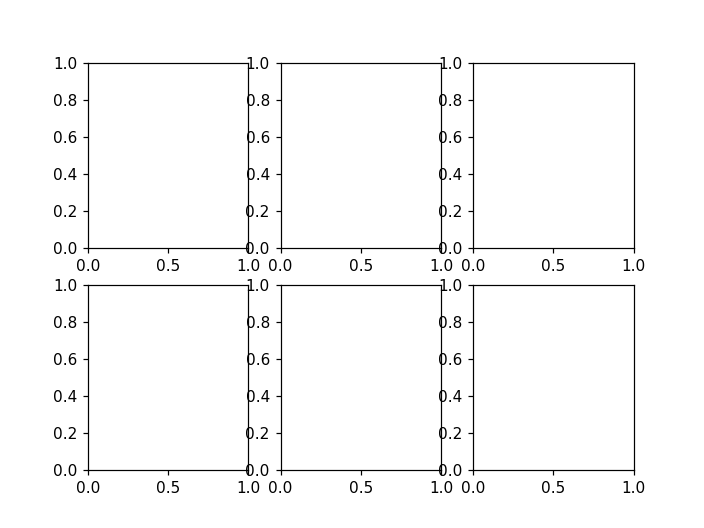

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C67C78AFD0>,
      dtype=object)

In [7]:
f, axes = plt.subplots(2, 3)
axes

 这个操作是很有用的。axes能用一个二位数据来索引，例如，axes[0, 1]。我们可以使用sharex和sharey来指定不同subplot有相同的x-或y-axis（其实就是令坐标轴的范围相同），这能让我们在同一范围内进行数据之间的比较。不然的话，matplotlib会自动绘图的范围不一定是一样的。下面是pyplot.subplot选项：



Adjusting the spacing around subplots（调整subplot直接的间隔）
默认情况下，matplotlib会在subplot之间留下一定间隔的边距，这取决于绘图的高度和跨度。所以如果我们调整绘图的大小，它会自动调整。我们可以用Figure对象下的subplots_adjust方法来更改间隔，当然，也可以用第一层级的函数：

subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
wspace和hspace控制figure宽度和长度的百分比，可以用来控制subplot之间的间隔。这里有一个例子，我们让间隔为0：

<IPython.core.display.Javascript object>


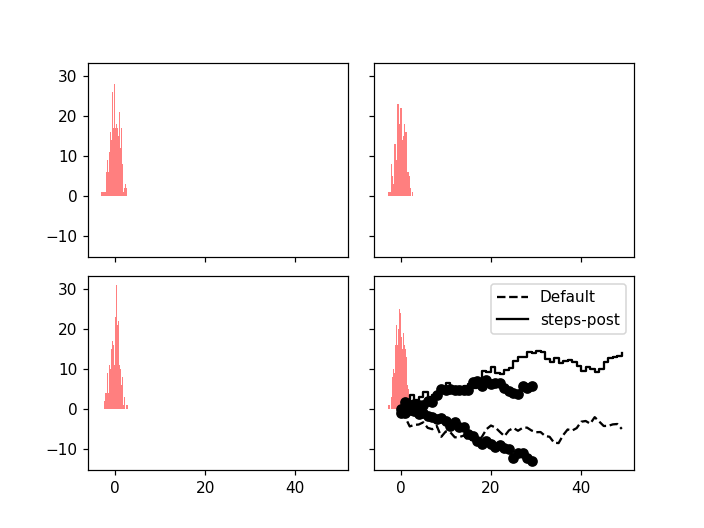

In [8]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='r', alpha=0.5)
plt.subplots_adjust(wspace=0.1, hspace=0.1)    

2 Colors, Markers, and Line Styles（颜色，标记物，线样式）
matplotlib的plot主函数能接受x和y坐标，在可选项中，字符串能指定颜色和线样式。例如，画出x和y，用绿色的点线：

ax.plot(x, y, 'g--')

这种方法可以很方便的同时指定颜色和线样式；不过有些用户可能不喜欢直接把规定颜色和样式的字符串写在一起，当然，我们也可以写得更明确一些：

ax.plot(x, y, linestyle='--', color='g')

有很多可供选择的颜色缩写，当然，我们也可以使用任意的颜色，通过制定hex code(十六进制码，比如'#CECECE')。通过查看plot的字符串文档，我们可以看到可供选择的所有线样式（直接输入plot?）。

另外还可以用markers（标记物）来高亮实际的数据点。因为matplotlib创建一个continuous line plot（连续线条图）的话，如果想要插入，可能看不清楚哪里可以插入数据点。而marker可以作为样式的一部分，字符串必须按颜色，标记物类型，样式这样的顺序：

In [9]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

In [10]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

对于点线图，我们注意到，默认情况下，后续点是通过线性添加上的。这个可以通过drawstyle来更改：

In [11]:
plt.plot(np.random.randn(50).cumsum(), 'k--', label='Default') 
plt.plot(np.random.randn(50).cumsum(), 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

3 Ticks, Labels, and Legends（标记，标签，图例）
对于大部分绘图的装饰，有两种主要的方法：使用pyplot（matplotlib.pyplot）和用更对象导向的简单的matplotlib API。

pyplot界面是为交互式使用而设计的，它包含很多方法，比如xlim, xticks, xticklabels。这些方法控制绘图的范围，标记位置，标记标签。有两种使用方法：

调用的时候不传入参数，使用当前的参数设置（例如，plt.xlim()返回当前X轴的范围）
调用的时候传入参数，使用传入的参数设置（例如，plt.xlim([0, 10]), 令X轴的范围从0到10）
所有这些方法，作用于激活的或最新创建的AxesSubplot对象上。每一个都在subplot有对应的两个方法；比如对于xlim，就有对应的ax.get_xlim和ax.set_xlim。这里作者使用subplot的方法，这样会更清晰。

Setting the title, axis labels, ticks, and ticklabels（设定标题，轴标签，标记，标记标签）
这里创建一个简单的图，画一个随机漫步：

<IPython.core.display.Javascript object>


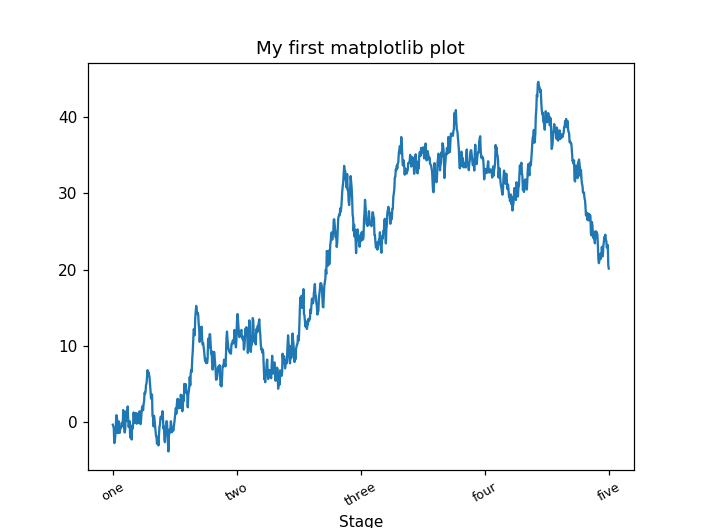

[Text(0.5, 0, 'Stage'), Text(0.5, 1.0, 'My first matplotlib plot')]

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

#为了改变x-axis tick（x轴标记），使用set_xticks和set_xticklabels。
#前者告诉matplotlib沿着x轴的范围，把标记放在哪里；默认会把所在位置作为标签，
#但我们可以用set_xticklabels来设置任意值作为标签：

ticks = ax.set_xticks([0, 250, 500, 750, 1000])

#rotation选项让x轴上的标记标签有一个30度的旋转。set_xlabel给x轴一个名字，而set_title给subplot一个标题：

labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#用相同的流程来更改y轴，把上面代码里的x变为y。axes类有一个set方法，能让我们一次设置很多绘图特性。

props = {'title': 'My first matplotlib plot', 'xlabel': 'Stage'}

ax.set(**props)

Adding legends （添加图例）
图例对于绘图很重要。有很多方式可以添加图例。最简单的方法是用label参数：

<IPython.core.display.Javascript object>


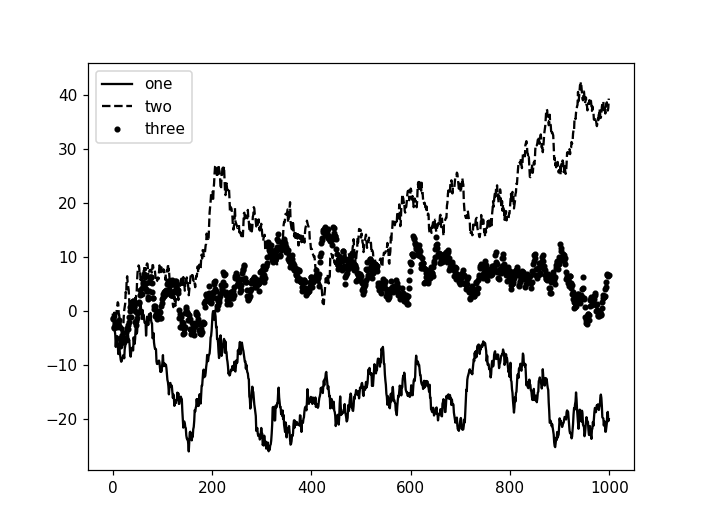

In [96]:

from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

要想画出图形的话，更需要细心一些。matplotlib有一些对象可以用来表示一些常见的图形，被称之为patches。其中一些，比如Rectangle和Circle，在matplotlib.pyplot也有，但是全套画图形的方法还是在matplotlib.patches里。

给图中添加一个图形，必须先添加一个patch对象，shp，然后通过调用ax.add_patch(shp)把它添加到subplot中：

<IPython.core.display.Javascript object>


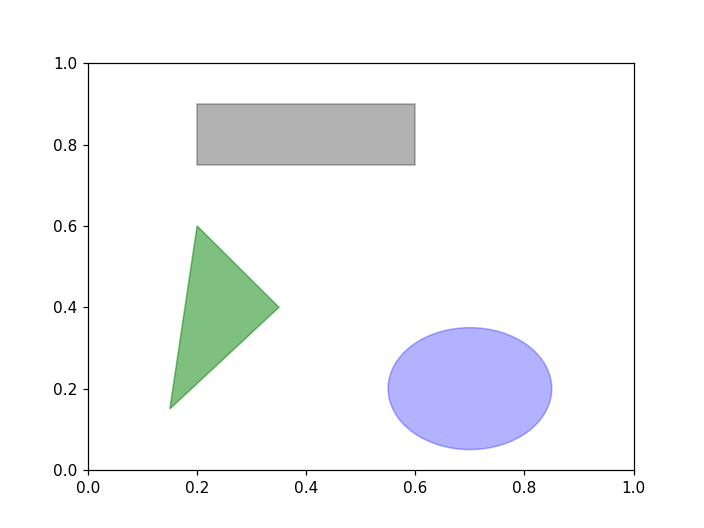

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# 9.2 Plotting with pandas and seaborn（用pandas和seaborn绘图）
matplotlib是一个相对底层的工具。pandas自身有内建的可视化工具。另一个库seaborn则是用来做一些统计图形。

导入seaborn会改变matlotlib默认的颜色和绘图样式，提高可读性和美感。即使不适用seaborn的API，也可以利用seaborn来提高可视化的效果。

1 Line Plots（线图）
Series和DataFrame各自都有plot属性，用来做一些比较基本的绘图类型。默认，plot()会绘制线图：

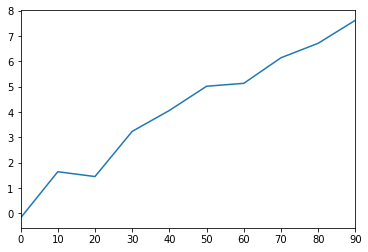

In [14]:
%matplotlib inline
# 如果不添加这句，是无法直接在jupyter里看到图的

import numpy as np
import pandas as pd

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

Series对象的index（索引），被matplotlib用来当做x轴，当然，我们也可以自己设定不这么做，use_index=False。x轴的ticks（标记）和limits（范围）能通过xticks和xlim选项来设定，而y轴的可以用yticks和ylim来设定。下面是关于plot的一些选项。



大部分的pandas绘图方法接受一个ax参数，可以作为一个matplotlib subplot对象。这给我们更强的灵活性在gird layout（网格样式）中放置subplot。

DataFrame的plot方法，会把每一列画出一条线，所有的线会画在同一个subplot（子图）上，而且可以添加legend（图例）：

           A         B         C         D
0   0.029539  0.239188  0.203747  0.395424
10 -1.289966 -0.139661  0.225187  0.709218
20 -2.444509 -0.773452  2.174108 -0.265259
30 -2.093597 -0.807686  1.135772 -0.200423
40 -3.118393  0.418803  0.195682  0.616377
50 -1.592078 -0.239076  1.064877  0.293906
60 -1.572796 -0.488745  0.415027 -1.647714
70 -2.574730 -0.286159  0.203951 -0.449187
80 -3.026030  0.825424  1.059353 -1.411319
90 -4.294738 -0.380068  0.811227 -0.907967


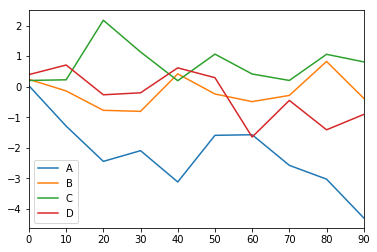

In [15]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
print(df)
df.plot()

# 2 Bar Plots（条形图）
plot.bar()和plot.barh()分别绘制垂直和水平的条形图。这种情况下，series或DataFrame的index会被用来作为x(bar)或y(barh)的ticks（标记）：

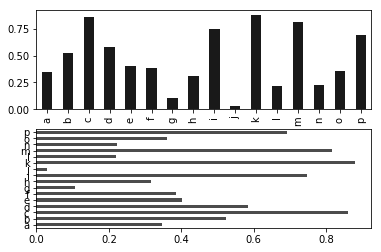

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.9)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

对于DataFrame，条形图绘图会把每一行作为一个组画出来：

In [17]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [18]:
df

Genus,A,B,C,D
one,0.176635,0.107299,0.475500,0.771277
two,0.036112,0.469486,0.442463,0.656817
three,0.876861,0.716280,0.007399,0.163942
four,0.257995,0.705689,0.192740,0.308441
five,0.657297,0.362001,0.032615,0.016392
six,0.330714,0.270673,0.131636,0.112236


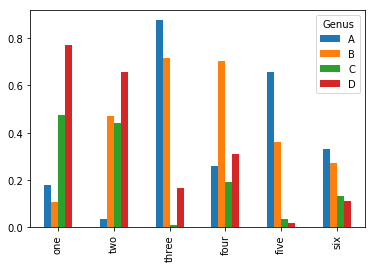

In [19]:
df.plot.bar()

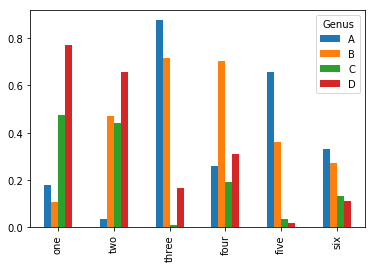

In [20]:
import seaborn
df.plot.bar()

我们可以设定stacked=True，令条形图堆叠起来，能让每一行的所有值都被堆起来：

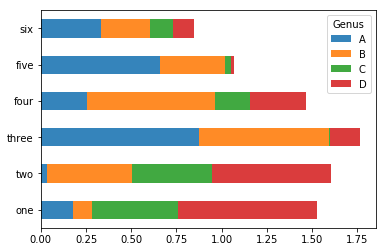

In [21]:
df.plot.barh(stacked=True, alpha=0.9)

In [38]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [39]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [40]:

party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [41]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


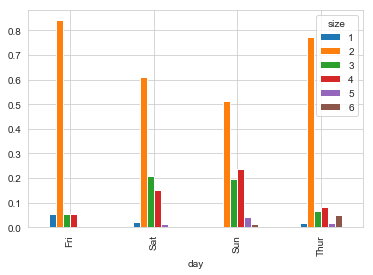

In [42]:
party_pcts.plot.bar()

In [43]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
values[:10]

0   -0.929581
1   -0.890743
2    0.014520
3    1.238620
4   -0.308327
5    0.133363
6   -0.700379
7   -0.460799
8    0.559081
9    0.323584
dtype: float64

# 4 Scatter or Point Plots（散点图或点图）
散点图对于检查二维数据之间的关系是非常有用的。例如，我们导入macrodata数据集，选一些参数，然后计算log differences（对数差分）：

In [44]:
macro = pd.read_csv('macro.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [45]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2
5,26.85,121.1,3.50,1.3
6,28.98,139.7,2.82,5.8
7,29.15,141.7,3.08,5.1
8,29.35,140.5,3.82,5.3
9,29.37,140.0,4.33,5.6


In [46]:
trans_data = np.log(data).diff().dropna()
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,-0.095479,-0.142165,0.000000,-1.386294
6,0.076340,0.142881,-0.216026,1.495494
7,0.005849,0.014215,0.088193,-0.128617
8,0.006838,-0.008505,0.215321,0.038466
9,0.000681,-0.003565,0.125317,0.055060
10,0.005772,-0.002861,-0.212805,-0.074108


In [47]:
import seaborn as sns

In [48]:
sns.set_style("whitegrid")

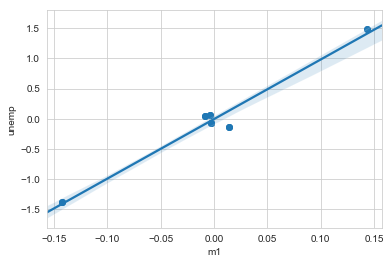

In [49]:
sns.regplot('m1', 'unemp', data=trans_data)

在数据探索阶段，散点图能把一组变量之间所有的散点图都画出来，这种图被称之为pairs plot（多变量图）或scatter plot matrix（散点图矩阵）。画这样的图很麻烦，所以seaborn有一个非常方便的pairplot函数，这个函数可以把每一个参数的柱状图或密度估计画在对角线上：

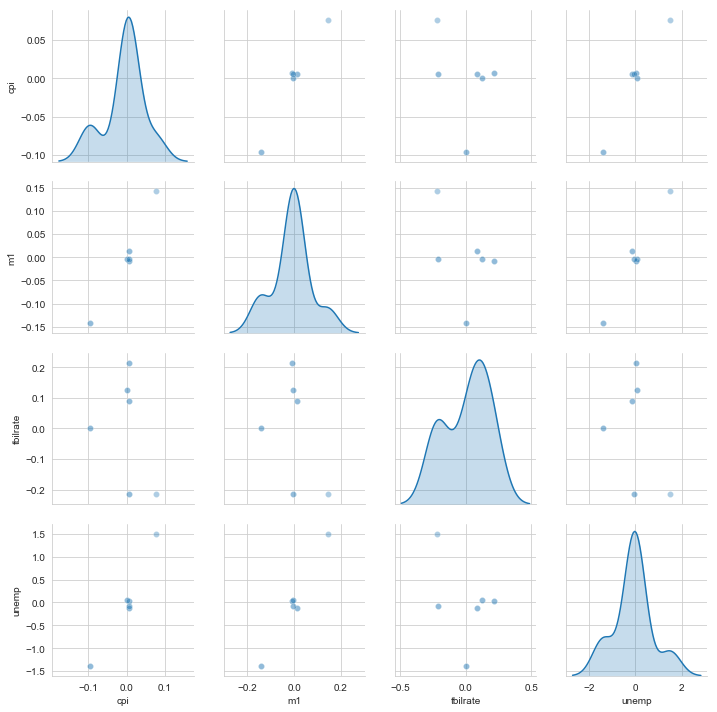

In [50]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

# 5 Facet Grids and Categorical Data（多面网格和类别数据）
如果遇到一些数据集，需要额外分组的维度，该怎么办？一个方法是使用类别变量来把数据可视化，利用facet grid（多面网格）。seaborn有一个有用的内建函数factorplot，能简化制作各种多面图的过程：

In [56]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


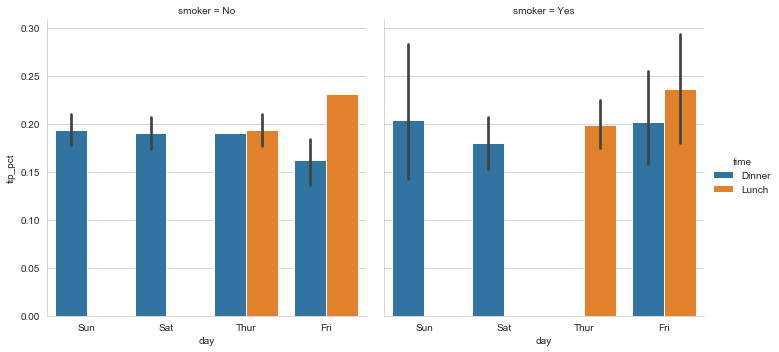

In [57]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', 
               kind='bar', data=tips[tips.tip_pct < 1])

In [58]:
tips[tips.tip_pct < 1].head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


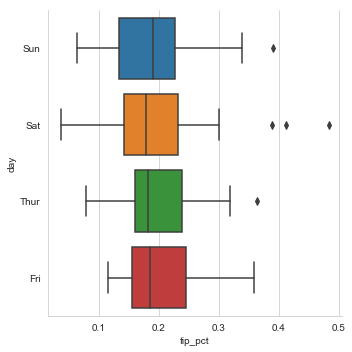

In [60]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])